In [209]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [210]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [211]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [212]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [213]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [214]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [215]:
# Save references to each table
Station=Base.classes.station
Measurement=Base.classes.measurement

In [216]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [217]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23')

In [218]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23')

In [219]:
# Calculate the date one year from the last date in data set.
last_year = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
print("Last Year: ", last_year)

Last Year:  2016-08-23


In [220]:
# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date,Measurement.prcp]
last_12months_prcp  = session.query(*sel).filter(Measurement.date >= last_year).all()


In [221]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
last_12months_prcp_df  = pd.DataFrame(last_12months_prcp, columns = ['date','Precipitation'])
last_12months_prcp_df  = last_12months_prcp_df.dropna(how = 'any')
last_12months_prcp_df  = last_12months_prcp_df.sort_values(["date"], ascending=True)
last_12months_prcp_df  = last_12months_prcp_df.set_index("date")
last_12months_prcp_df

,Precipitation
date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.08


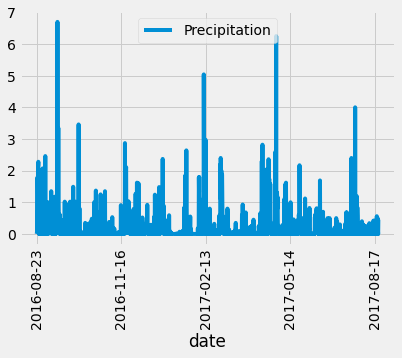

In [222]:
# Use Pandas Plotting with Matplotlib to plot the data
last_12months_prcp_df.plot()
plt.legend(loc=9)
plt.xticks(rotation=90)
plt.show()

In [223]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_12months_prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [224]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(Station).count()
print(f"There are {stations} stations")

There are 9 stations


In [225]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_station = session.query(Measurement.station, func.count(Measurement.station)).\
                   group_by(Measurement.station).\
                   order_by(func.count(Measurement.station).desc()).all()
most_active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [226]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]
most_active_519281= session.query(*sel).filter(Measurement.station == "USC00519281").all()
most_active_519281

[('2010-01-01', 0.15),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-05', 0.0),
 ('2010-01-06', 0.01),
 ('2010-01-07', 0.17),
 ('2010-01-08', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-11', 0.03),
 ('2010-01-12', 0.0),
 ('2010-01-13', 0.0),
 ('2010-01-14', 0.0),
 ('2010-01-15', 0.0),
 ('2010-01-16', 0.0),
 ('2010-01-17', 0.0),
 ('2010-01-18', 0.0),
 ('2010-01-19', 0.0),
 ('2010-01-20', 0.0),
 ('2010-01-21', 0.16),
 ('2010-01-22', 0.0),
 ('2010-01-23', 0.0),
 ('2010-01-24', 0.0),
 ('2010-01-25', 0.0),
 ('2010-01-26', 0.01),
 ('2010-01-27', 0.31),
 ('2010-01-28', 0.37),
 ('2010-01-29', 0.75),
 ('2010-01-30', 2.17),
 ('2010-01-31', 0.69),
 ('2010-02-01', 0.02),
 ('2010-02-02', 0.0),
 ('2010-02-03', 0.37),
 ('2010-02-04', 0.0),
 ('2010-02-05', 0.02),
 ('2010-02-06', 0.0),
 ('2010-02-07', 0.0),
 ('2010-02-08', 0.0),
 ('2010-02-09', 0.0),
 ('2010-02-10', 0.0),
 ('2010-02-11', 0.0),
 ('2010-02-12', 0.08),
 ('2010-02-13', 0.06),
 ('2010-02-14', 

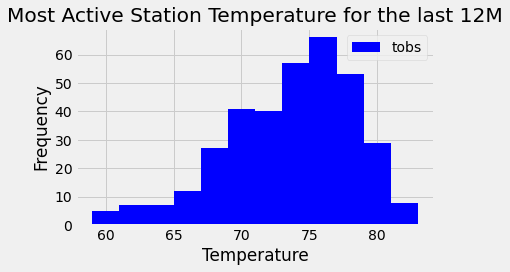

In [227]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel = [Measurement.date,Measurement.tobs]
last_12months_prcp = session.query(*sel).filter(Measurement.date >= last_year).\
                                  filter(Measurement.station == "USC00519281").\
                                  order_by(Measurement.date).all()
most_active_519281_df = pd.DataFrame(last_12months_prcp, columns = ['date','tobs'])
most_active_519281_df = most_active_519281_df.dropna(how = 'any')
most_active_519281_df = most_active_519281_df.set_index("date")
most_active_519281_df

most_active_519281_df.plot.hist(bins = 12, title= "Most Active Station Temperature for the last 12M",
                    color = "blue")

plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Close session

In [228]:
# Close Session
session.close()